In [377]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [388]:
df = pd.read_csv('international_matches.csv')
matches = pd.read_csv('matchs-schudule.csv',delimiter=';')
groups_teams = pd.read_csv('Qatar2022-teams.csv')

In [487]:
df.head(5)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
df.shape

(23921, 25)

In [217]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [12]:
df['date'] = pd.to_datetime(df['date'])


In [20]:
fifa_df = df[['date','home_team','away_team','home_team_fifa_rank','away_team_fifa_rank','home_team_total_fifa_points','away_team_total_fifa_points']]

home_df = fifa_df[['date','home_team','home_team_fifa_rank','home_team_total_fifa_points']].rename(columns={'home_team':'team',
                                                                                                           'home_team_fifa_rank':'rank',
                                                                                                           'home_team_total_fifa_points':'rank_points'})

away_df = fifa_df[['date','away_team','away_team_fifa_rank','away_team_total_fifa_points']].rename(columns={'away_team':'team',
                                                                                                           'away_team_fifa_rank':'rank',
                                                                                                           'away_team_total_fifa_points':'rank_points'})


In [22]:
away_df.head(5)

,date,team,rank,rank_points
0,1993-08-08,Uruguay,22,0
1,1993-08-08,Mexico,14,0
2,1993-08-08,Venezuela,94,0
3,1993-08-08,Sierra Leone,86,0
4,1993-08-08,Argentina,5,0


In [23]:
fifa_df1 = pd.concat([home_df,away_df],axis=0)

In [24]:
fifa_df1.shape

(47842, 4)

In [25]:
fifa_df1 = fifa_df1.sort_values(['team','date'],ascending=[True,False])

In [28]:
fifa_df2 = fifa_df1.groupby('team')


In [34]:
print(fifa_df2.size())

team
Afghanistan       101
Albania           245
Algeria           296
American Samoa     31
Andorra           189
                 ... 
Vietnam           207
Wales             239
Yemen             188
Zambia            423
Zimbabwe          314
Length: 211, dtype: int64


In [33]:
fifa_df2.first().nsmallest(10,columns='rank')

,date,rank,rank_points
team,,,
Brazil,2022-06-06,1,1832
Belgium,2022-06-14,2,1827
France,2022-06-13,3,1789
Argentina,2022-06-05,4,1765
England,2022-06-14,5,1761
Italy,2022-06-14,6,1723
Spain,2022-06-12,7,1709
Portugal,2022-06-12,8,1674
Mexico,2022-06-14,9,1658


In [35]:
null_columns = [col for col in df.columns if df[col].isnull().any()]
print(f'Null columns in the dataset are :{null_columns}')

Null columns in the dataset are :['home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']


In [552]:
teams = ['Qatar','Ecuador','Senegal','Netherlands','England','IR Iran','USA','Wales','Argentina','Saudi Arabia','Mexico','Poland',
        'France','Australia','Denmark','Tunisia','Spain','Costa Rica','Germany','Japan','Belgium','Canada','Morocco','Croatia','Brazil','Serbia','Switzerland','Cameroon',
        'Portugal','Ghana','Uruguay','Korea Republic']
len(teams)

32

In [47]:
for team in teams:
    for col in null_columns:
        df[col].fillna(df[df[col[0:9]]==team][col].mean(),inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

In [49]:
# is there an home team advantage?
home_team = df[['country','home_team_score','away_team_score']]
home_win  = home_team.loc[home_team['home_team_score'] > home_team['away_team_score']]
home_win.shape

(11591, 3)

In [50]:
home_lost  = home_team.loc[home_team['home_team_score'] < home_team['away_team_score']]
home_lost.shape

(6623, 3)

In [52]:
# home_adv = home_win[['country','home_team_score','away_team_score']].rename(columns={'home_team_score':'Home_team_win','away_team_score':'Home_team_lost'})
# away_adv = home_lost[['country','home_team_score','away_team_score']].rename(columns={'home_team_score':'Home_team_win','away_team_score':'Home_team_lost'})

#We can see home_win rows are more than home_lost rows, hence can be concluded that home teams do have an advantage

In [57]:
# which team has the most wins?
home_team1 = df[['date','home_team','away_team','home_team_score','away_team_score']]
home_team1.head()

,date,home_team,away_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,Uruguay,3,1
1,1993-08-08,Brazil,Mexico,1,1
2,1993-08-08,Ecuador,Venezuela,5,0
3,1993-08-08,Guinea,Sierra Leone,1,0
4,1993-08-08,Paraguay,Argentina,1,3


In [58]:
home_win1  = home_team1.loc[home_team1['home_team_score'] > home_team1['away_team_score']]
home_win1.shape

(11591, 5)

In [60]:
home_lost1  = home_team1.loc[home_team1['home_team_score'] < home_team1['away_team_score']]
home_lost1.head(5)

,date,home_team,away_team,home_team_score,away_team_score
4,1993-08-08,Paraguay,Argentina,1,3
5,1993-08-08,Peru,Colombia,0,1
8,1993-08-11,Faroe Islands,Norway,0,7
9,1993-08-11,Sweden,Switzerland,1,2
26,1993-08-31,Iceland,USA,0,1


In [61]:
home_team_wins = home_win1[['date','home_team','home_team_score','away_team_score']].rename(columns={'home_team':'team','home_team_score':'Goals_winning_team','away_team_score':'Goals_losing_team'})
away_team_wins = home_lost1[['date','away_team','home_team_score','away_team_score']].rename(columns={'away_team':'team','home_team_score':'Goals_losing_team','away_team_score':'Goals_winning_team'})

In [62]:
home_team_wins.head(10)

,date,team,Goals_winning_team,Goals_losing_team
0,1993-08-08,Bolivia,3,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0
10,1993-08-15,Australia,2,1
11,1993-08-15,Bolivia,1,0
12,1993-08-15,Colombia,2,1
15,1993-08-22,Argentina,2,1
16,1993-08-22,Bolivia,7,0


In [63]:
away_team_wins.head(10)

,date,team,Goals_losing_team,Goals_winning_team
4,1993-08-08,Argentina,1,3
5,1993-08-08,Colombia,0,1
8,1993-08-11,Norway,0,7
9,1993-08-11,Switzerland,1,2
26,1993-08-31,USA,0,1
27,1993-09-05,Colombia,0,5
29,1993-09-05,Uruguay,0,1
30,1993-09-05,Portugal,0,2
32,1993-09-06,Zimbabwe,0,1
33,1993-09-08,Denmark,0,1


In [66]:
team_concat = pd.concat([home_team_wins,away_team_wins],axis=0)

In [70]:
team_concat[team_concat['Goals_winning_team'] > team_concat['Goals_losing_team']].shape

(18214, 4)

In [78]:
# Team with the most wins
print('Team with most wins \n')
print(team_concat['team'].value_counts().nlargest(1))

Team with most wins 

Brazil    292
Name: team, dtype: int64


In [80]:
a = team_concat.sort_values(['team','date'],ascending=[True,False])
b = a.groupby('team')
print(b.size().nlargest(1))

team
Brazil    292
dtype: int64


In [81]:
# Do teams with stronger offense players score more goals?
# Do teams with stronger goalkeeper players receive fewer goals?

In [86]:
offense_score= []
for team in teams:
    score = df[df['home_team']==team]['home_team_mean_offense_score'].mean() + df[df['away_team']==team]['away_team_mean_offense_score'].mean()
    avg_score = np.round(score/2,3)
    offense_score.append(avg_score)

In [94]:
offense_scores_df = pd.DataFrame({'Teams': teams,'Offense Scores':offense_score})
offense_scores_df.index = list(np.arange(1,33))
offense_scores_df = offense_scores_df.sort_values(by='Offense Scores')

In [593]:
offense_scores_df = offense_scores_df.sort_values('Teams').reset_index(drop=True)
offense_scores_df.sort_values('Offense Scores',ascending=False)

,Teams,Offense Scores
0,Argentina,83.510
26,Spain,82.408
11,France,81.912
19,Netherlands,81.882
21,Portugal,81.809
10,England,81.688
3,Brazil,81.677
30,Uruguay,80.554
12,Germany,80.427
2,Belgium,79.480


In [134]:
goals_conceded,goals_scored = [],[]
goals_scored_home,goals_scored_away = [],[]
goals_conceded_home,goals_conceded_away = [],[]
for team in teams:
    gch = df[df['home_team']==team]['away_team_score'].sum()
    gsh = df[df['home_team']==team]['home_team_score'].sum()
    gca = df[df['away_team']==team]['home_team_score'].sum()
    gsa = df[df['away_team']==team]['away_team_score'].sum()
    
    goals_scored_home.append(gsh)
    goals_scored_away.append(gsa)
    goals_conceded_home.append(gch)
    goals_conceded_away.append(gca)
    goals_conceded.append(gch+gca)
    goals_scored.append(gsh+gsa)
    

team_goals = pd.DataFrame({'Teams':teams,'Goals scored at home':goals_scored_home,'Goals conceded at home':goals_conceded_home,'Goals scored away':goals_scored_away,'Goals conceded away':goals_conceded_away,'Total Goals Scored':goals_scored,'Total Goals Conceded':goals_conceded})
team_goals['Goal_difference'] = team_goals['Total Goals Scored'] - team_goals['Total Goals Conceded']
team_goals['Goal_ratio'] = team_goals['Total Goals Scored']/team_goals['Total Goals Conceded']

team_goals = team_goals.sort_values('Goal_difference',ascending=False)  

In [599]:
team_goals = team_goals.reset_index(drop=True)
team_goals= team_goals.sort_values('Teams').reset_index(drop=True)
team_goals.sort_values('Goal_ratio',ascending=False)

,Teams,Goals scored at home,Goals conceded at home,Goals scored away,Goals conceded away,Total Goals Scored,Total Goals Conceded,Goal_difference,Goal_ratio
3,Brazil,558,141,396,159,954,300,654,3.180000
26,Spain,469,107,312,141,781,248,533,3.149194
14,IR Iran,425,115,288,165,713,280,433,2.546429
11,France,447,154,223,112,670,266,404,2.518797
10,England,384,132,246,119,630,251,379,2.509960
21,Portugal,424,124,244,144,668,268,400,2.492537
19,Netherlands,426,145,274,142,700,287,413,2.439024
12,Germany,544,220,331,171,875,391,484,2.237852
1,Australia,435,127,194,164,629,291,338,2.161512
18,Morocco,347,113,149,127,496,240,256,2.066667


In [530]:
# Applying poisson distribution now
# Will find the value of lambda by multiplying the median goals scored/conceded by the teams


# for team in teams:
temp_df_median_home = df.groupby('home_team').mean()
#     score = df[df['home_team']==team]['home_team_mean_offense_score'].mean() + df[df['away_team']==team]['away_team_mean_offense_score'].mean()
#     avg_score = np.round(score/2,3)
#     offense_score.append(avg_score)

In [533]:
temp_df_median_home['home_team'] = temp_df_median_home.index

In [531]:
temp_df_median_away = df.groupby('away_team').mean()

In [534]:
temp_df_median_away['away_team'] = temp_df_median_away.index

In [535]:
temp_df_median_away = temp_df_median_away.reset_index(drop=True)
temp_df_median_home = temp_df_median_home.reset_index(drop=True)

In [559]:
# Calculating lambda values by multiplying mean of goals scored at home and away
median_home= []
median_away= []
for team in teams:
        a= temp_df_median_home[temp_df_median_home['home_team']==team]['home_team_score']
        b= temp_df_median_home[temp_df_median_home['home_team']==team]['away_team_score']
        c= temp_df_median_away[temp_df_median_away['away_team']==team]['away_team_score']
        d= temp_df_median_away[temp_df_median_away['away_team']==team]['home_team_score']
        median_home.append(float(a*b))
        median_away.append(float(c*d))
        #rint(a)


            

In [565]:
dict_lambda_home = dict(zip(teams,median_home))
dict_lambda_away = dict(zip(teams,median_away))

In [555]:
# lst = []
# a=(temp_df_median_home[temp_df_median_home['home_team']=='Brazil']['home_team_score'])# * temp_df_median_home[temp_df_median_home['home_team']==team]['away_team_score'])
# b=(temp_df_median_home[temp_df_median_home['home_team']=='Brazil']['away_team_score'])
# print(a)
# print(b)
# lst.append(float(a*b))
# lst

27    2.39485
Name: home_team_score, dtype: float64
27    0.60515
Name: away_team_score, dtype: float64


[1.449243861555748]

In [136]:
temp_df = team_goals[['Total Goals Scored','Goal_difference','Goal_ratio']]


In [142]:
offenseVsgoals = pd.concat([offense_scores_df,temp_df],axis=1)
offenseVsgoals

,Teams,Offense Scores,Total Goals Scored,Goal_difference,Goal_ratio
0,Argentina,83.510,657,325,1.978916
1,Australia,74.722,629,338,2.161512
2,Belgium,79.480,563,234,1.711246
3,Brazil,81.677,954,654,3.180000
4,Cameroon,77.462,436,116,1.362500
5,Canada,72.952,311,35,1.126812
6,Costa Rica,72.659,552,79,1.167019
7,Croatia,78.416,545,230,1.730159
8,Denmark,76.690,504,206,1.691275
9,Ecuador,75.366,437,23,1.055556


In [138]:
goalkeeper_score= []
for team in teams:
    score = df[df['home_team']==team]['home_team_goalkeeper_score'].mean() + df[df['away_team']==team]['away_team_goalkeeper_score'].mean()
    avg_score = np.round(score/2,3)
    goalkeeper_score.append(avg_score)

In [596]:
gk_df = pd.DataFrame({'Teams':teams,'Goalkeeper Score':goalkeeper_score})
gk_df = gk_df.sort_values('Teams').reset_index(drop=True)
gk_df.sort_values('Goalkeeper Score',ascending=False)

,Teams,Goalkeeper Score
26,Spain,83.055
12,Germany,82.272
11,France,81.205
3,Brazil,79.816
10,England,79.105
19,Netherlands,79.033
2,Belgium,78.551
21,Portugal,78.416
20,Poland,78.176
29,USA,77.347


In [150]:
temp_gk = gk_df['Goalkeeper Score']
offenseVsgoals = pd.concat([offenseVsgoals,temp_gk],axis=1)
offenseVsgoals

,Teams,Offense Scores,Total Goals Scored,Goal_difference,Goal_ratio,Goalkeeper Score
0,Argentina,83.510,657,325,1.978916,77.287
1,Australia,74.722,629,338,2.161512,76.032
2,Belgium,79.480,563,234,1.711246,78.551
3,Brazil,81.677,954,654,3.180000,79.816
4,Cameroon,77.462,436,116,1.362500,75.320
5,Canada,72.952,311,35,1.126812,71.765
6,Costa Rica,72.659,552,79,1.167019,75.070
7,Croatia,78.416,545,230,1.730159,76.106
8,Denmark,76.690,504,206,1.691275,76.580
9,Ecuador,75.366,437,23,1.055556,71.422


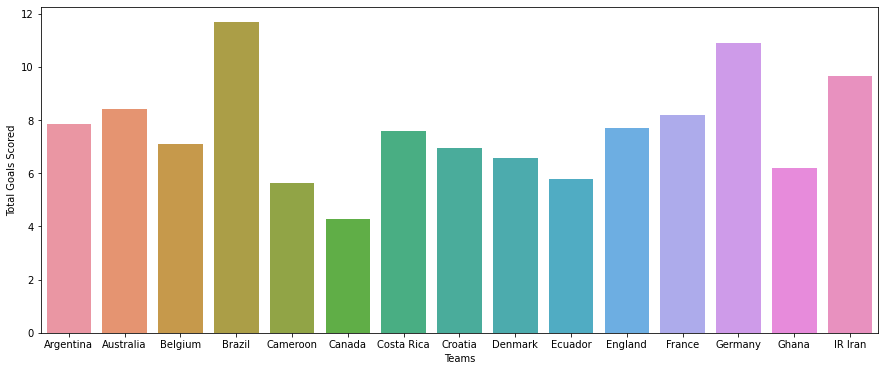

In [160]:
plt.figure(figsize=(15,6))
sns.barplot(x='Teams',y=offenseVsgoals['Total Goals Scored']/offenseVsgoals['Offense Scores'],data=offenseVsgoals[:15])
plt.xlabel('Teams')
plt.ylabel('Total Goals Scored')
plt.show()

In [162]:
temp_df = team_goals['Total Goals Conceded']

In [163]:
goalkeepervsgoals = pd.concat([gk_df,temp_df],axis=1)
goalkeepervsgoals

,Teams,Goalkeeper Score,Total Goals Conceded
0,Argentina,77.287,332
1,Australia,76.032,291
2,Belgium,78.551,329
3,Brazil,79.816,300
4,Cameroon,75.320,320
5,Canada,71.765,276
6,Costa Rica,75.070,473
7,Croatia,76.106,315
8,Denmark,76.580,298
9,Ecuador,71.422,414


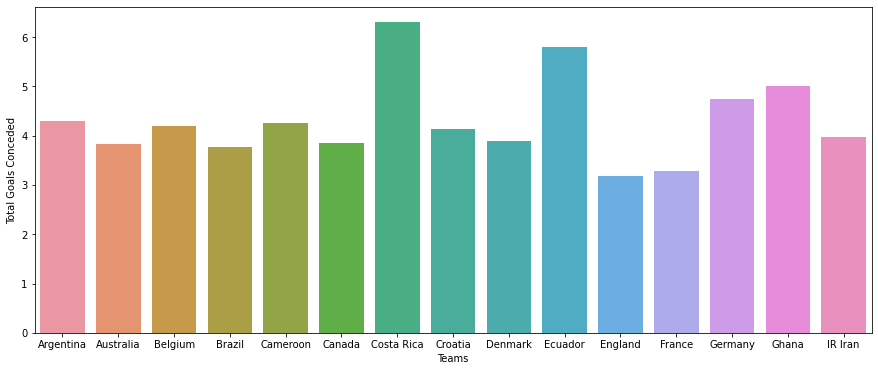

In [164]:
plt.figure(figsize=(15,6))
sns.barplot(x='Teams',y=(goalkeepervsgoals['Total Goals Conceded']/goalkeepervsgoals['Goalkeeper Score']),data=goalkeepervsgoals[:15])
plt.xlabel('Teams')
plt.ylabel('Total Goals Conceded')
plt.show()

In [167]:
midfield_score= []
for team in teams:
    score = df[df['home_team']==team]['home_team_mean_midfield_score'].mean() + df[df['away_team']==team]['away_team_mean_midfield_score'].mean()
    avg_score = np.round(score/2,3)
    midfield_score.append(avg_score)

In [168]:
defense_score = []
for team in teams:
    score = df[df['home_team']==team]['home_team_mean_defense_score'].mean() + df[df['away_team']==team]['away_team_mean_defense_score'].mean()
    avg_score = np.round(score/2,3)
    defense_score.append(avg_score)

In [597]:
mf_df = pd.DataFrame({'Teams':teams,'Midfield Score':midfield_score})
mf_df = mf_df.sort_values('Teams').reset_index(drop=True)
mf_df.sort_values('Midfield Score',ascending=False)

,Teams,Midfield Score
26,Spain,83.107
11,France,82.042
12,Germany,81.620
10,England,81.164
0,Argentina,80.939
3,Brazil,80.818
21,Portugal,80.766
19,Netherlands,80.584
25,Serbia,80.310
2,Belgium,79.204


In [598]:
df_df = pd.DataFrame({'Teams':teams,'Defense Score':defense_score})
df_df = df_df.sort_values('Teams').reset_index(drop=True)
df_df.sort_values('Defense Score',ascending=False)

,Teams,Defense Score
26,Spain,80.639
25,Serbia,80.228
10,England,79.801
12,Germany,79.319
3,Brazil,79.314
11,France,79.191
21,Portugal,78.921
0,Argentina,78.478
2,Belgium,77.540
19,Netherlands,77.174


In [180]:
type(gk_df)

pandas.core.frame.DataFrame

In [193]:
# # Overall mean score
# Overall_score = []
# for team in teams:
#     score = offense_scores_df[offense_scores_df['Teams']==team]['Offense Scores'] + gk_df[gk_df['Teams']==team]['Goalkeeper Score']+mf_df[mf_df["Teams"]==team]['Midfield Score'] + df_df[df_df['Teams']==team]['Defense Score']
#     #print(score)
#     avg_score = np.round(score/4,3)
#     Overall_score.append(avg_score)

In [201]:
# ov_df = pd.DataFrame({'Teams':teams,'Overall Score':Overall_score})
# ov_df = ov_df.sort_values('Teams').reset_index(drop=True)
# ov_df

In [ ]:
# Adding features(Don't execute rn)

df['rank_difference'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank']
df['average_rank'] = (df['home_team_fifa_rank'] + df['away_team_fifa_rank'])/2
df['point_difference'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']
df['is_stake'] = df['tournament'] != 'Friendly'

df['is_won'] =  df['home_team_result']

In [197]:
df['home_team_total_fifa_points'].tail(10)

23911    1535
23912    1388
23913    1446
23914    1229
23915    1461
23916     932
23917     895
23918    1526
23919    1553
23920    1519
Name: home_team_total_fifa_points, dtype: int64

In [211]:
fifa_df = df[df['tournament']=='FIFA World Cup']

In [256]:
df['rank_difference'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank']
df['average_rank'] = (df['home_team_fifa_rank'] + df['away_team_fifa_rank'])/2
df['point_difference'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']
# df['is_stake'] = df['tournament'] != 'Friendly'
# df['Gk_diff'] = df['home_team_goalkeeper_score'] - df['away_team_goalkeeper_score']
# df['DF_diff'] = df['home_team_mean_defense_score'] - df['away_team_mean_defense_score']
# df['MF_diff'] = df['home_team_mean_midfield_score'] - df['away_team_mean_midfield_score']
# df['OF_diff'] = df['home_team_mean_offense_score'] - df['away_team_mean_offense_score']
# df['is_worldcup'] = 'FIFA World Cup' in df['tournament']

df['score_difference'] = df['home_team_score'] - df['away_team_score']

In [257]:
def winner_lose_value(row):
    if row['score_difference'] > 0:
        return 1
    else:
        return 0

In [258]:
df['is_won'] = df.apply(winner_lose_value,axis=1)

In [260]:
df = df[df['tournament'] != 'Friendly']

In [262]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score',
       'rank_difference', 'average_rank', 'point_difference',
       'score_difference', 'is_won'],
      dtype='object')

In [237]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [263]:
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference']],df['is_won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [369]:
X1 = df.loc[:,['home_team', 'away_team','average_rank', 'rank_difference', 'point_difference','is_won']]
X1.head(20)

,home_team,away_team,average_rank,rank_difference,point_difference,is_won
0,Bolivia,Uruguay,40.5,37,0,1
2,Ecuador,Venezuela,64.5,-59,0,1
4,Paraguay,Argentina,36.0,62,0,0
5,Peru,Colombia,44.5,51,0,0
10,Australia,Canada,49.0,6,0,1
11,Bolivia,Ecuador,47.0,24,0,1
12,Colombia,Argentina,12.0,14,0,1
13,Congo,Guinea,86.0,42,0,0
14,Uruguay,Brazil,15.0,14,0,0
15,Argentina,Peru,37.5,-65,0,1


In [264]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lg_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
acc_log

69.64

In [265]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

66.68

In [279]:
# # let's define the rankings at the time of the World Cup
# rank_df = rank_df.loc[(rank_df['rank_date'] == rank_df['rank_date'].max()) and (rank_df['country_full'].isin(teams_df['Team'].unique()))]

In [307]:
dummy_df = df.sort_values('date',ascending=False).groupby('home_team')

In [329]:
dict_rank_fifa = {}
dict_points_fifa = {}
ranks_2022 = []
fifa_points = []
for team in teams:
    rank = dummy_df.get_group(team).iloc[0]['home_team_fifa_rank']
    fifa_point = dummy_df.get_group(team).iloc[0]['home_team_total_fifa_points']
    ranks_2022.append(rank)
    fifa_points.append(fifa_point)
dict_rank_fifa = dict(zip(teams,ranks_2022))
dict_points_fifa = dict(zip(teams,fifa_points))

In [428]:
dict_points_fifa['South Korea'] = dict_points_fifa['Korea Republic']
dict_rank_fifa['South Korea'] = dict_rank_fifa['Korea Republic']

In [340]:
def input_features(team1,team2):
    
    input_query = []
    
    team1_features = [0]*2
    team2_features = [0]*2
    
    team1_features[0] = dict_rank_fifa[team1]
    team1_features[1] = dict_points_fifa[team1]
    
    team2_features[0] = dict_rank_fifa[team2]
    team2_features[1] = dict_points_fifa[team2]                                   
                                        
    avg_rank = (team1_features[0] +  team2_features[0])/2
    rank_diff = team1_features[0] - team2_features[0]
    point_diff = team1_features[1] - team2_features[1]
    
    input_query.append(avg_rank)
    input_query.append(rank_diff)
    input_query.append(point_diff)
    
    return np.array(input_query).reshape(1,3)

In [410]:
team1 = 'Brazil'
team2 = 'Senegal'
input_features(team1,team2)

array([[ 11., -18., 239.]])

In [411]:
input_features(team2,team1)

array([[  11.,   18., -239.]])

In [378]:
result = logreg.predict(input_features('Brazil','Qatar'))
result

array([1], dtype=int64)

In [379]:
result1 = logreg.predict(input_features('Qatar','Brazil'))
print(result1)
print(logreg.predict_proba(input_features('Qatar','Brazil')))

[0]
[[0.79104063 0.20895937]]


In [380]:
logreg.predict_proba(a)

array([[0.30449958, 0.69550042]])

In [381]:
logreg.predict_proba(a)[0][0]

0.3044995816212751

In [ ]:
def close_or_draw(probability_array):
    if abs(probability_array[0][0] - probability_array[0][1]) < 0.2:
        

In [355]:
team1,team2 = 'Argentina','Brazil'

In [356]:
def match_result_probability():
    result = logreg.predict(input_features(team1,team2))
    if result == 0:
        print(f'{team1} winning chance : {result[0][1]}')
        print(f'{team2} winning chance : {result[0][0]}')
    

In [481]:
group_matches.head(5)

,match,date,Team1,Team2,phase,Team1_win_chance,Team2_win_chance,Winner/Result
0,1,21/11/2022,Qatar,Ecuador,group matches,0.410380,0.589620,Close match/could be a draw
1,2,21/11/2022,Senegal,Netherlands,group matches,0.378081,0.621919,Netherlands
2,3,21/11/2022,England,Iran,group matches,0.517133,0.482867,England
3,4,21/11/2022,USA,Wales,group matches,0.447991,0.552009,Close match/could be a draw
4,5,22/11/2022,France,Australia,group matches,0.644913,0.355087,France


In [482]:
def find_group(row):
    team1=row['Team1']
    
    group = groups_teams[groups_teams['Team']==team1]['Group'].to_string(index=False)
    return group
    

In [484]:
group_matches['Group'] = group_matches.apply(find_group,axis=1)

In [486]:
group_matches = group_matches.sort_values('Group',ascending=True)
group_matches

,match,date,Team1,Team2,phase,Team1_win_chance,Team2_win_chance,Winner/Result,Group
0,1,21/11/2022,Qatar,Ecuador,group matches,0.410380,0.589620,Close match/could be a draw,A
1,2,21/11/2022,Senegal,Netherlands,group matches,0.378081,0.621919,Netherlands,A
35,36,29/11/2022,Netherlands,Qatar,group matches,0.659638,0.340362,Netherlands,A
34,35,29/11/2022,Ecuador,Senegal,group matches,0.316229,0.683771,Senegal,A
18,19,25/11/2022,Netherlands,Ecuador,group matches,0.622257,0.377743,Netherlands,A
17,18,25/11/2022,Qatar,Senegal,group matches,0.285239,0.714761,Senegal,A
2,3,21/11/2022,England,Iran,group matches,0.517133,0.482867,England,B
3,4,21/11/2022,USA,Wales,group matches,0.447991,0.552009,Close match/could be a draw,B
33,34,29/11/2022,Iran,USA,group matches,0.400690,0.599310,Close match/could be a draw,B
32,33,29/11/2022,Wales,England,group matches,0.361490,0.638510,England,B


In [433]:
# def match_result(row):
#     team1=row['country1']
#     team2=row['country2']
    
#     query1 = input_features(team1,team2)
#     query2 = input_features(team2,team1)
#     ##print(query)
#     result1 = logreg.predict(query1)
#     result2 = logreg.predict(query2)
#     probability_array = logreg.predict_proba(query1)
#     if abs(probability_array[0][0] - probability_array[0][1]) < 0.2 and result1 == 0 and result2 == 0:
#         print(f"{team1} Vs {team2} : Close match/could be a draw")
#         print(f'{team1} winning chance : {probability_array[0][1]}')
#         print(f'{team2} winning chance : {probability_array[0][0]}')
#     else:
#         if probability_array[0][1] > probability_array[0][0]:
#             winner = team1
#         else:
#             winner = team2
#         print(f"{team1} Vs {team2} : Winner - {winner}")
#         print(f'{team1} winning chance : {probability_array[0][1]}')
#         print(f'{team2} winning chance : {probability_array[0][0]}')
        
    

In [467]:
def match_result(row):
    
    inputs = []
    
    team1=row['country1']
    team2=row['country2']
    
    query1 = input_features(team1,team2)
    query2 = input_features(team2,team1)
    ##print(query)
    result1 = logreg.predict(query1)
    result2 = logreg.predict(query2)
    probability_array = logreg.predict_proba(query1)
    if abs(probability_array[0][0] - probability_array[0][1]) < 0.2 and result1 == 0 and result2 == 0:
        inputs.append(probability_array[0][1])
        inputs.append(probability_array[0][0])
        inputs.append("Close match/could be a draw")
        return inputs
        #return probability_array[0][1],probability_array[0][0],"Close match/could be a draw"
#         print(f'{team1} winning chance : {probability_array[0][1]}')
#         print(f'{team2} winning chance : {probability_array[0][0]}')
    else:
        if probability_array[0][1] > probability_array[0][0]:
            winner = team1
        else:
            winner = team2
        inputs.append(probability_array[0][1])
        inputs.append(probability_array[0][0])
        inputs.append(winner)
        return inputs
#         print(f"{team1} Vs {team2} : Winner - {winner}")
#         print(f'{team1} winning chance : {probability_array[0][1]}')
#         print(f'{team2} winning chance : {probability_array[0][0]}')

In [468]:
status = group_matches.apply(match_result,axis=1)

In [470]:
group_matches['Team1_win_chance'] = list(map(lambda x : x[0],status))
group_matches['Team2_win_chance'] = list(map(lambda x : x[1],status))
group_matches['Winner/Result'] = list(map(lambda x : x[2],status))

In [476]:
group_matches=group_matches.rename(columns={'country1':'Team1','country2':'Team2'})

In [582]:
group_matches.head()

,match,date,Team1,Team2,phase,Team1_win_chance,Team2_win_chance,Winner/Result,Group
0,1,21/11/2022,Qatar,Ecuador,group matches,0.410380,0.589620,Close match/could be a draw,A
1,2,21/11/2022,Senegal,Netherlands,group matches,0.378081,0.621919,Netherlands,A
35,36,29/11/2022,Netherlands,Qatar,group matches,0.659638,0.340362,Netherlands,A
34,35,29/11/2022,Ecuador,Senegal,group matches,0.316229,0.683771,Senegal,A
18,19,25/11/2022,Netherlands,Ecuador,group matches,0.622257,0.377743,Netherlands,A


In [ ]:
from scipy.stats import poisson as psn

In [ ]:
def points_prediction(team1,team2):
    if team1 in teams and team2 in teams:
        prob_home, prob_away, prob_draw = 0, 0, 0
        for goals_team1 in range(0,10):
            for goals_team2 in range(0,10):
                prob = psn.pmf(goals_team1,dict_lambda_home[(team1)])*psn.pmf(goals_team2,dict_lambda_home[(team2)])
                if goals_team1 == goals_team2:
                    prob_draw += prob
                elif goals_team1 > goals_team2:
                    prob_home += prob
                else:
                    prob_away += prob

        points_home = 3 * prob_home + prob_draw
        points_away = 3 * prob_away + prob_draw
        return (points_home, points_away)
    else:
        return (0,0)

In [591]:
points_prediction('England','France')

(1.3296064005742059, 1.4154087957189687)